In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from scipy.stats import zscore

In [ ]:
 Step 1: Load Dataset

In [3]:
 df = pd.read_csv("apartment for rent dataset.csv", encoding='ISO-8859-1', sep=';')
print("Dataset loaded successfully!")
print(f"Shape: {df.shape}")

C:\Users\pssha\AppData\Local\Temp\ipykernel_29360\1516453415.py:1: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("apartment for rent dataset.csv", encoding='ISO-8859-1', sep=';')


Dataset loaded successfully!
Shape: (99492, 22)


In [5]:
# Data Overview & Understanding

print("\n=== Data Overview ===")
print(df.info())
print("\nFirst 5 rows:")
print(df.head())


=== Data Overview ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             99492 non-null  int64  
 1   category       99492 non-null  object 
 2   title          99492 non-null  object 
 3   body           99492 non-null  object 
 4   amenities      83448 non-null  object 
 5   bathrooms      99429 non-null  float64
 6   bedrooms       99368 non-null  float64
 7   currency       99492 non-null  object 
 8   fee            99492 non-null  object 
 9   has_photo      99492 non-null  object 
 10  pets_allowed   39068 non-null  object 
 11  price          99491 non-null  float64
 12  price_display  99491 non-null  object 
 13  price_type     99492 non-null  object 
 14  square_feet    99492 non-null  int64  
 15  address        7943 non-null   object 
 16  cityname       99190 non-null  object 
 17  state          99190 non-nu

In [ ]:
# Data Cleaning

In [7]:
# Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())


Missing values per column:
id                   0
category             0
title                0
body                 0
amenities        16044
bathrooms           63
bedrooms           124
currency             0
fee                  0
has_photo            0
pets_allowed     60424
price                1
price_display        1
price_type           0
square_feet          0
address          91549
cityname           302
state              302
latitude            25
longitude           25
source               0
time                 0
dtype: int64


In [9]:
# Handle missing values
df['amenities'] = df['amenities'].fillna('None')
df['square_feet'] = df['square_feet'].fillna(df['square_feet'].median())   

# Convert price to numeric (remove $ and commas)
df['price'] = df['price'].astype(str).str.replace('$', '', regex=False).str.replace(',', '', regex=False).astype(float)

# Convert time to datetime
df['time'] = pd.to_datetime(df['time'], unit='s')

# Remove duplicates
df = df.drop_duplicates()
print(f"Shape after cleaning: {df.shape}")


Shape after cleaning: (99408, 22)


In [ ]:
# Feature Engineering

In [11]:
df['price_per_sqft'] = df['price'] / df['square_feet']
df['has_pool'] = df['amenities'].str.contains('Pool', case=False).astype(int)
df['has_gym'] = df['amenities'].str.contains('Gym', case=False).astype(int)
df['has_parking'] = df['amenities'].str.contains('Parking', case=False).astype(int)


In [ ]:
# Exploratory Data Analysis (EDA)


=== Histograms ===


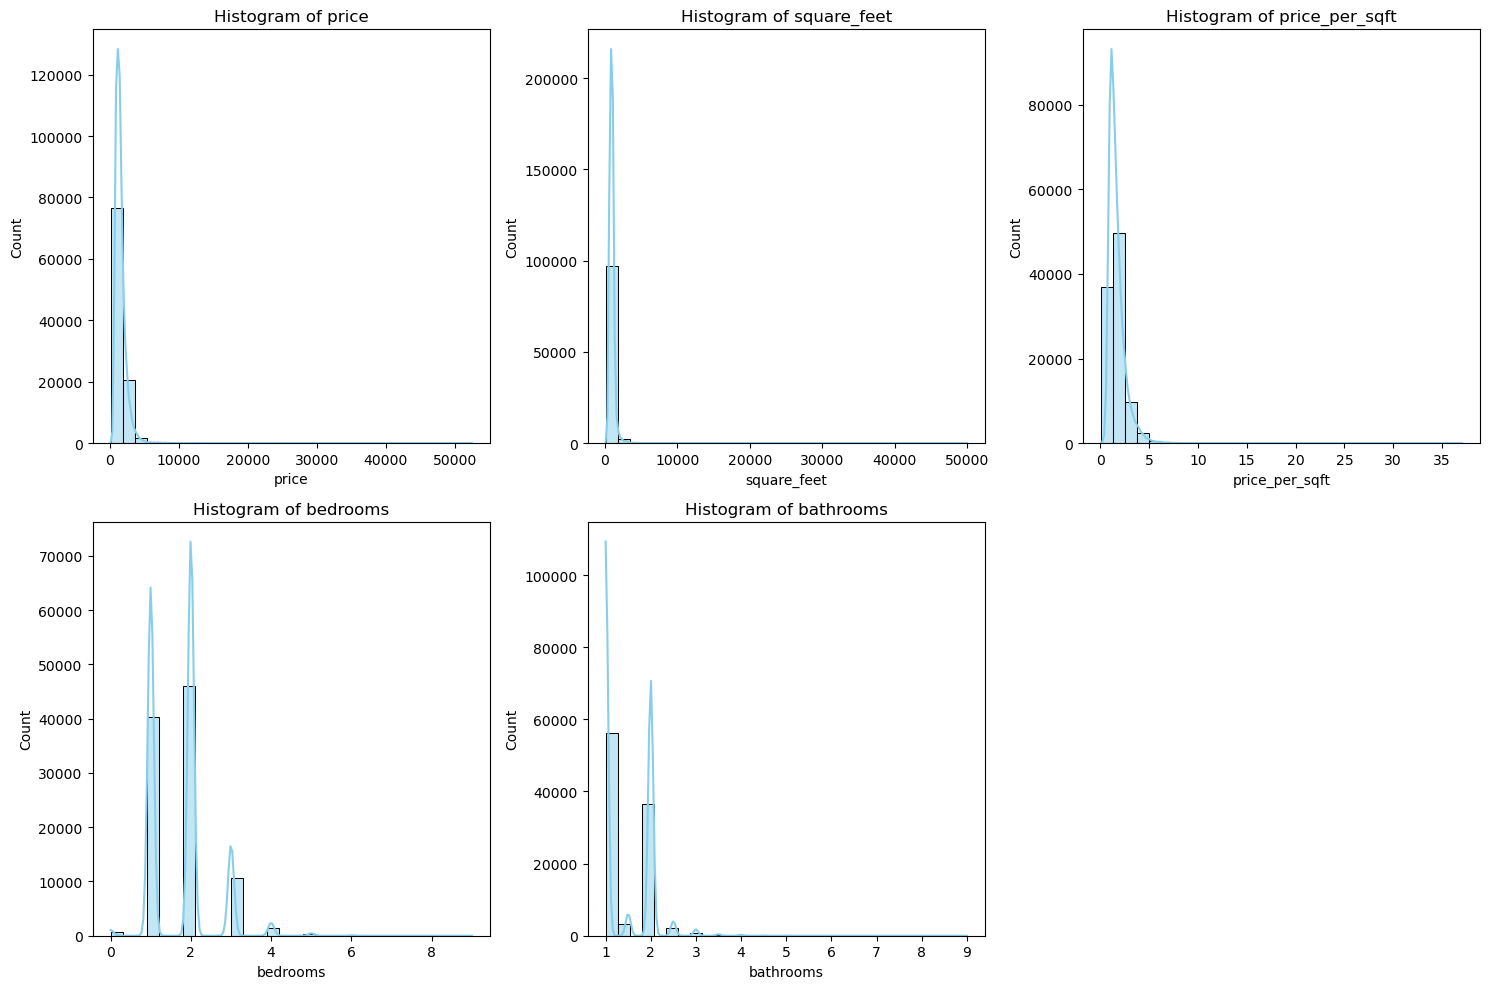


=== Boxplots ===


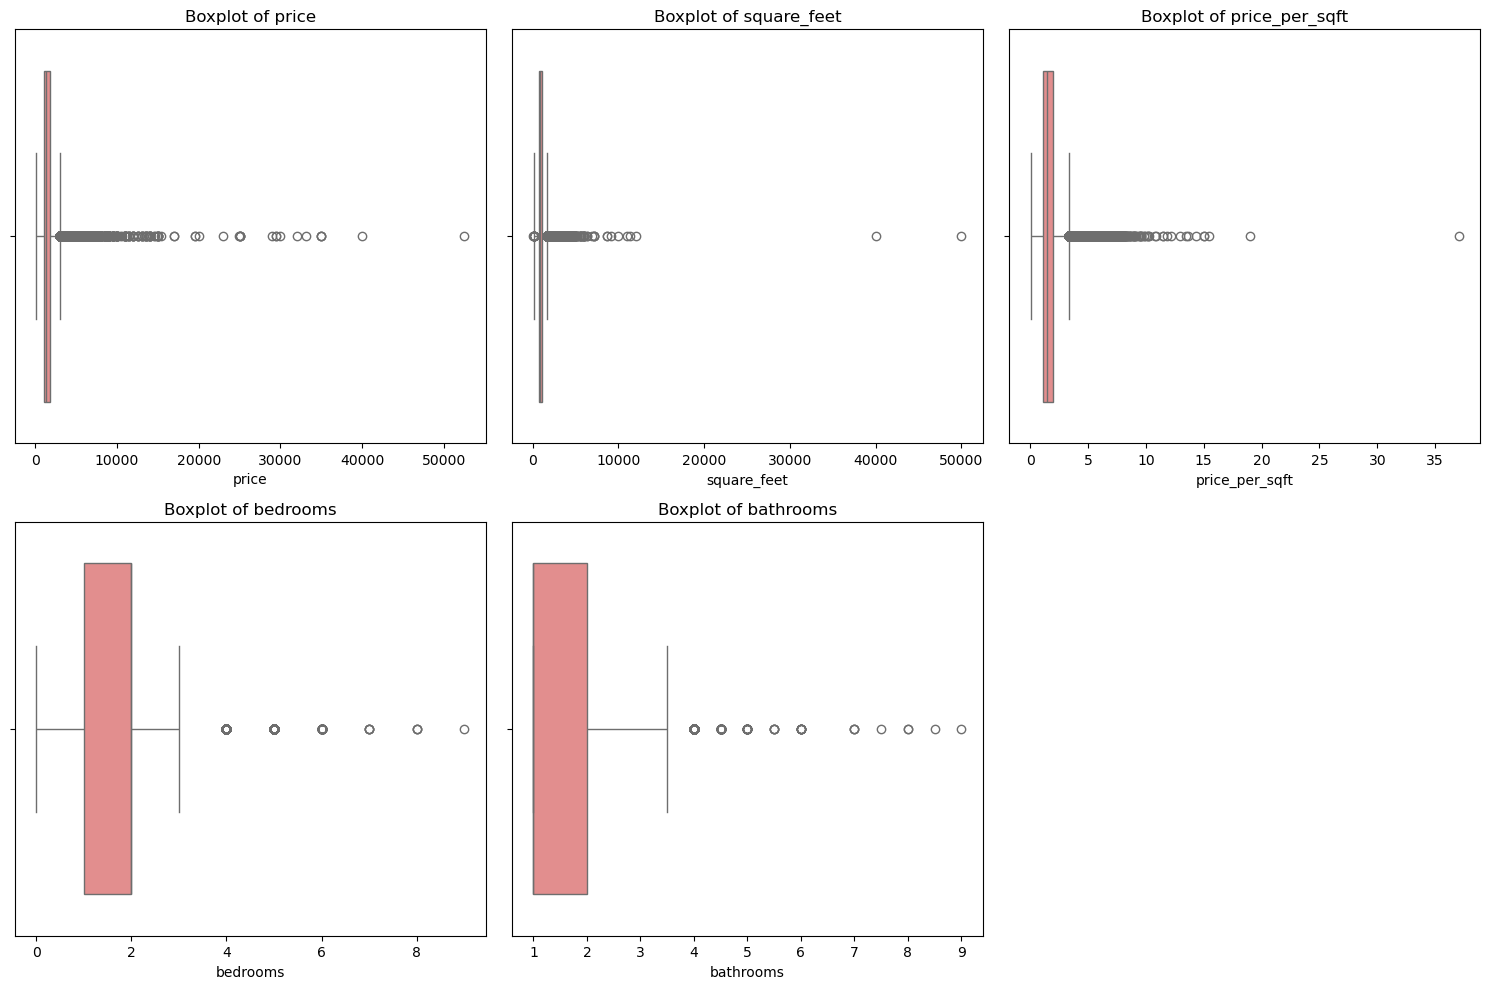


=== Correlation Heatmap ===


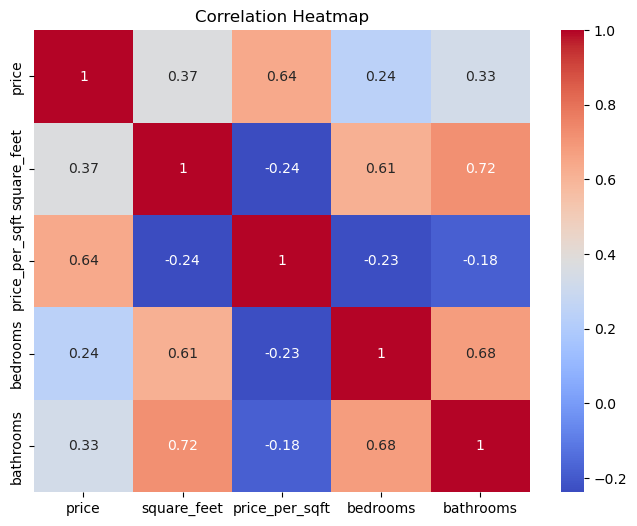

In [13]:
numeric_features = ['price', 'square_feet', 'price_per_sqft', 'bedrooms', 'bathrooms']

# Histogram
print("\n=== Histograms ===")
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_features):
    plt.subplot(2, 3, i+1)
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Histogram of {col}')
plt.tight_layout()
plt.show()

# Boxplots
print("\n=== Boxplots ===")
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_features):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x=df[col], color='lightcoral')
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

# Correlation Heatmap
print("\n=== Correlation Heatmap ===")
plt.figure(figsize=(8, 6))
sns.heatmap(df[numeric_features].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# Outlier Detection

In [17]:
print("\n=== Outlier Analysis ===")
outlier_features = ['price', 'square_feet', 'price_per_sqft', 'bedrooms']


=== Outlier Analysis ===


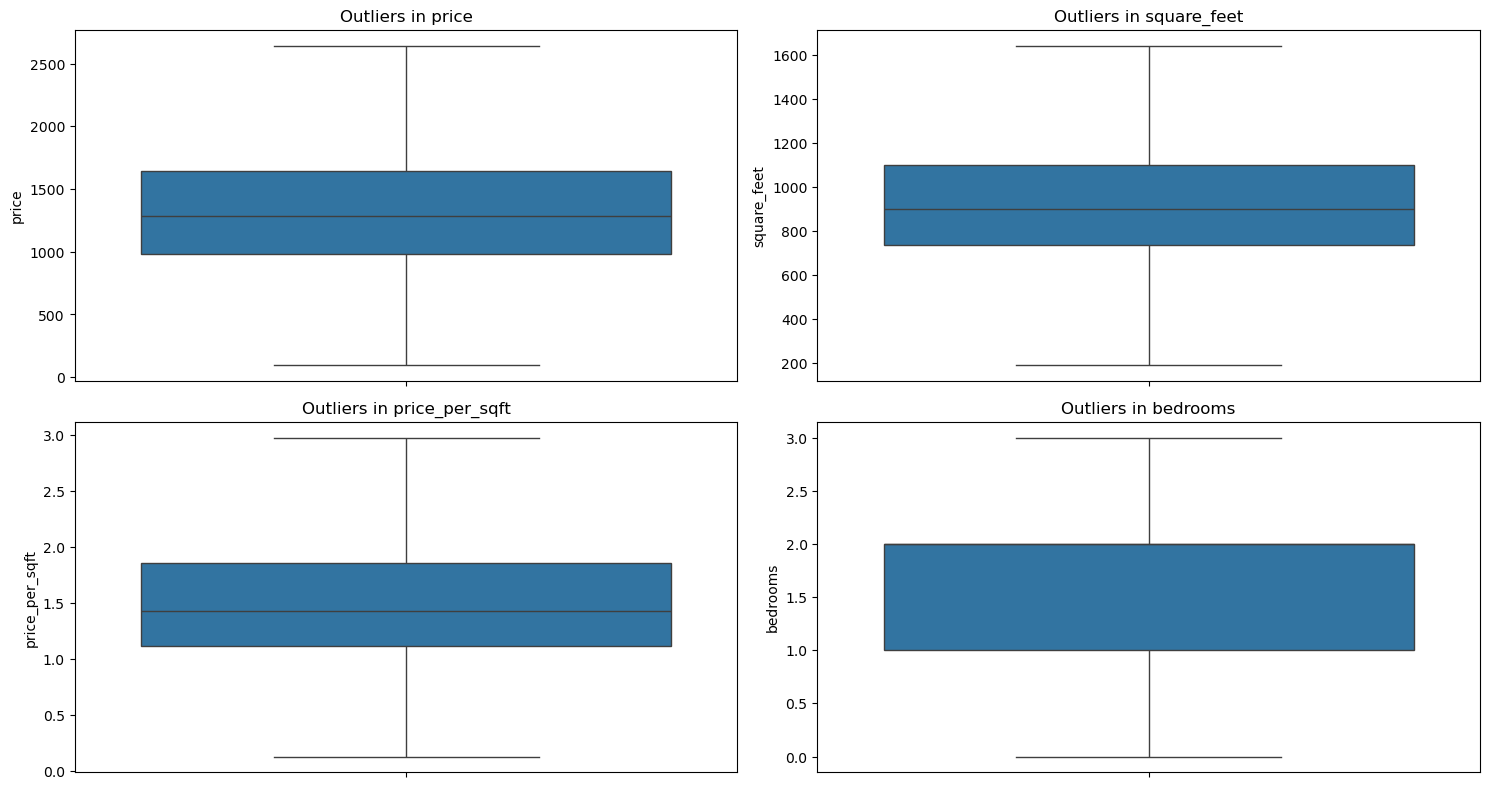

In [38]:
#Visual Outliner Detection

plt.figure(figsize=(15, 8))
for i, feature in enumerate(outlier_features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=df[feature])
    plt.title(f'Outliers in {feature}')
plt.tight_layout()
plt.show()

df.reset_index(drop=True, inplace=True)  # ✅ RESET INDEX HERE

In [40]:
# Quantitative Outlier Analysis

print("\n=== Outlier Statistics ===")
for feature in outlier_features:
    q1 = df[feature].quantile(0.25)
    q3 = df[feature].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    
    outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]
    print(f"\n{feature}:")
    print(f"- IQR: {iqr:.2f}")
    print(f"- Bounds: [{lower_bound:.2f}, {upper_bound:.2f}]")
    print(f"- Outliers: {len(outliers)} ({len(outliers)/len(df)*100:.2f}%)")
df.reset_index(drop=True, inplace=True)  # ✅ RESET INDEX HERE


=== Outlier Statistics ===

price:
- IQR: 665.00
- Bounds: [-17.50, 2642.50]
- Outliers: 0 (0.00%)

square_feet:
- IQR: 363.00
- Bounds: [190.50, 1642.50]
- Outliers: 0 (0.00%)

price_per_sqft:
- IQR: 0.75
- Bounds: [-0.01, 2.98]
- Outliers: 0 (0.00%)

bedrooms:
- IQR: 1.00
- Bounds: [-0.50, 3.50]
- Outliers: 0 (0.00%)


In [42]:
# Outlier Treatment (Capping method)

print("\n=== Applying Outlier Capping ===")
for feature in outlier_features:
    q1 = df[feature].quantile(0.25)
    q3 = df[feature].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    
    df[feature] = np.where(df[feature] < lower_bound, lower_bound,
                         np.where(df[feature] > upper_bound, upper_bound, df[feature]))
df.reset_index(drop=True, inplace=True)  # ✅ RESET INDEX HERE


=== Applying Outlier Capping ===



=== Post-Outlier Treatment Visualizations ===


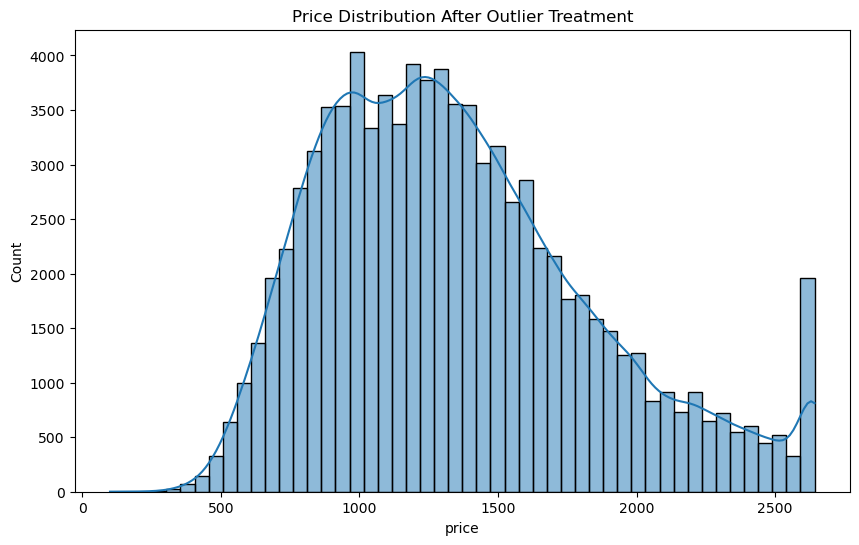

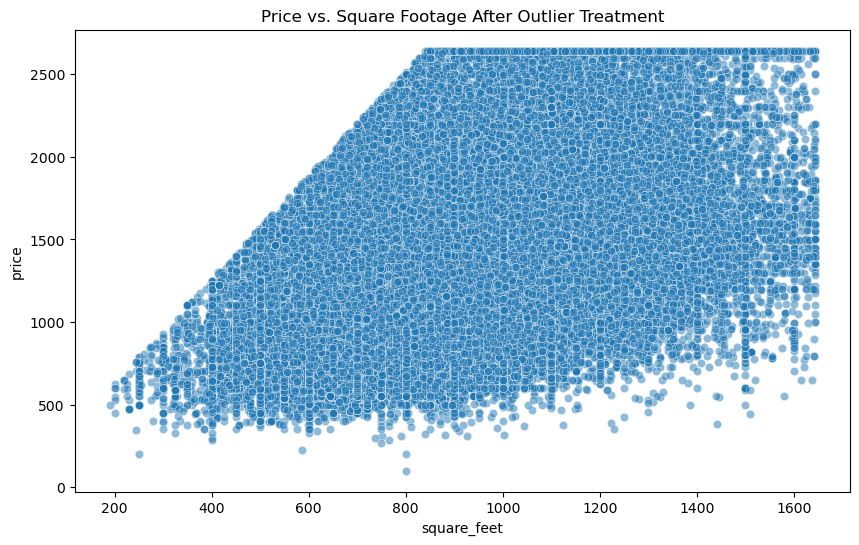

In [44]:
# Post-Treatment Visualization

print("\n=== Post-Outlier Treatment Visualizations ===")
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=50, kde=True)
plt.title('Price Distribution After Outlier Treatment')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='square_feet', y='price', alpha=0.5)
plt.title('Price vs. Square Footage After Outlier Treatment')
plt.show()
df.reset_index(drop=True, inplace=True)  # ✅ RESET INDEX HERE

In [ ]:
 # Preprocessing

In [27]:
features = df[['price', 'square_feet', 'price_per_sqft', 'bedrooms', 'bathrooms']]
imputer = SimpleImputer(strategy='median')
features_imputed = imputer.fit_transform(features)

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_imputed)


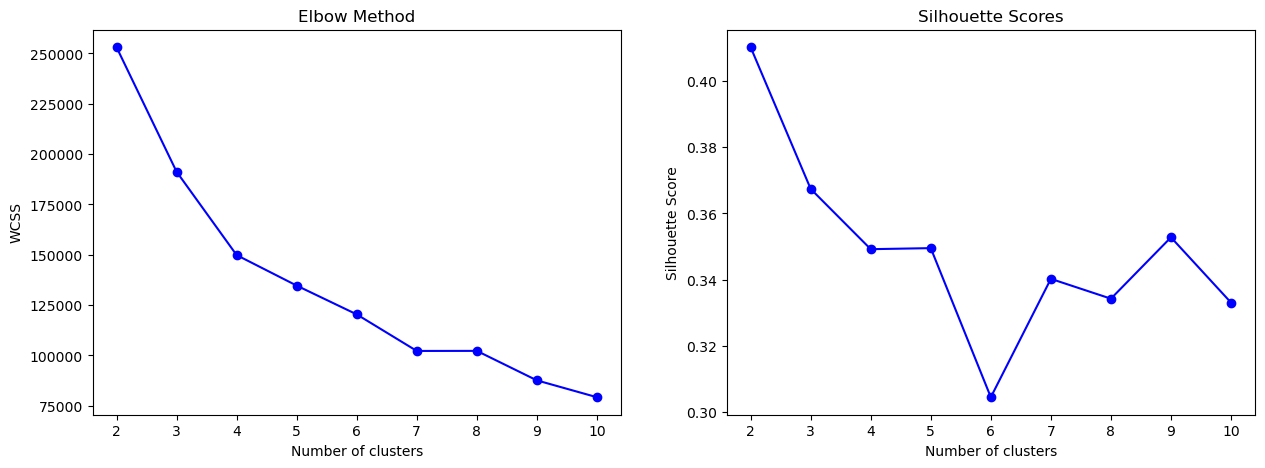

In [30]:
# Clustering Evaluation (Elbow & Silhouette for K-Means)

wcss = []
silhouette_scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(scaled_features, kmeans.labels_))

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(k_range, wcss, 'bo-')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_scores, 'bo-')
plt.title('Silhouette Scores')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

optimal_k = 3



In [46]:
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['kmeans_cluster'] = kmeans.fit_predict(scaled_features)

# DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
df['dbscan_cluster'] = dbscan.fit_predict(scaled_features)

# Hierarchical (Sampled due to MemoryError)
sampled_df = df.sample(n=1000, random_state=42)
sampled_indices = sampled_df.index.tolist()
sampled_scaled = scaled_features[sampled_indices]

hierarchical = AgglomerativeClustering(n_clusters=optimal_k)
df.loc[sampled_indices, 'hierarchical_cluster'] = hierarchical.fit_predict(sampled_scaled)


In [ ]:
# PCA Visualization

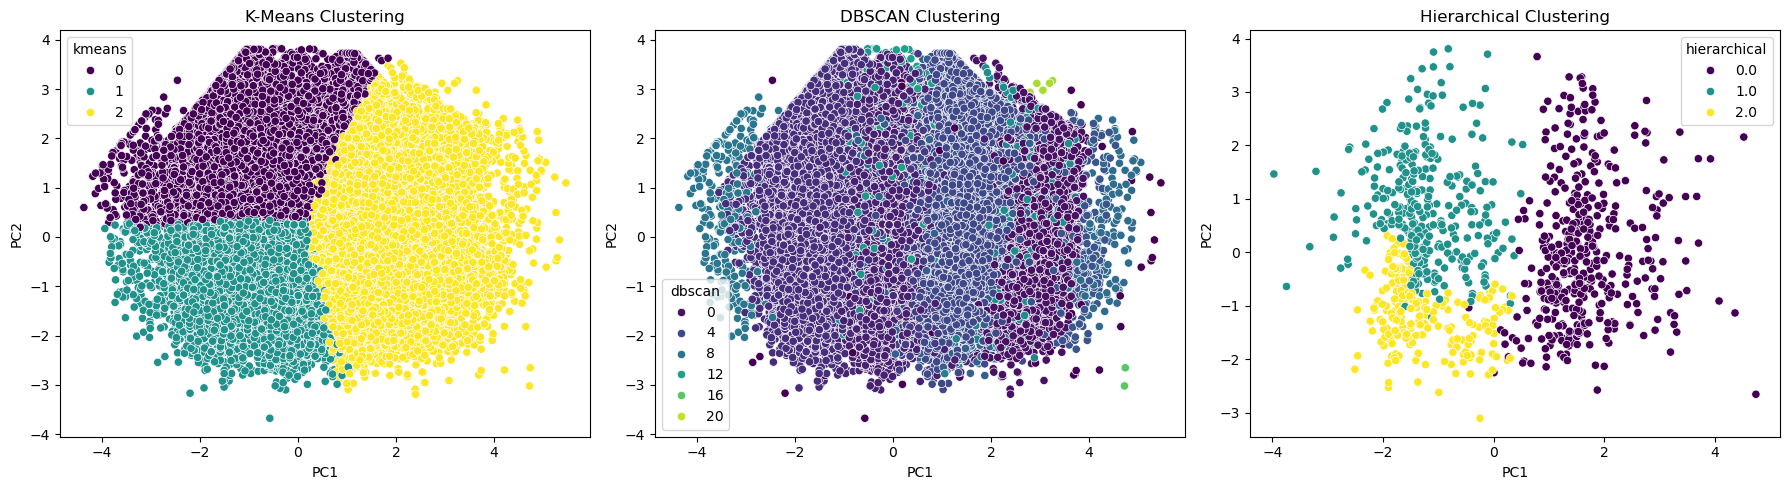

In [48]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_features)
principal_df = pd.DataFrame(principal_components, columns=['PC1', 'PC2'])

principal_df['kmeans'] = df['kmeans_cluster']
principal_df['dbscan'] = df['dbscan_cluster']
principal_df['hierarchical'] = df['hierarchical_cluster']

plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
sns.scatterplot(data=principal_df, x='PC1', y='PC2', hue='kmeans', palette='viridis')
plt.title('K-Means Clustering')

plt.subplot(1, 3, 2)
sns.scatterplot(data=principal_df, x='PC1', y='PC2', hue='dbscan', palette='viridis')
plt.title('DBSCAN Clustering')

plt.subplot(1, 3, 3)
sns.scatterplot(data=principal_df, x='PC1', y='PC2', hue='hierarchical', palette='viridis')
plt.title('Hierarchical Clustering')

plt.tight_layout()
plt.show()

In [ ]:
# Cluster Analysis

In [50]:
def analyze_clusters(df, method_name):
    print(f"\n=== {method_name.upper()} CLUSTER ANALYSIS ===")
    cluster_stats = df.groupby(method_name).agg({
        'price': ['mean', 'median', 'count'],
        'square_feet': 'mean',
        'price_per_sqft': 'mean',
        'bedrooms': 'mean',
        'bathrooms': 'mean',
        'has_pool': 'mean',
        'has_gym': 'mean',
        'has_parking': 'mean'
    })
    print(cluster_stats)

analyze_clusters(df, 'kmeans_cluster')
analyze_clusters(df, 'dbscan_cluster')
analyze_clusters(df, 'hierarchical_cluster')



=== KMEANS_CLUSTER CLUSTER ANALYSIS ===
                      price                 square_feet price_per_sqft  \
                       mean  median  count         mean           mean   
kmeans_cluster                                                           
0               1703.811086  1630.0  19530   760.038121       2.268775   
1                963.758413   953.0  32597   764.494279       1.285801   
2               1519.533957  1450.0  36060  1145.171894       1.340016   

                bedrooms bathrooms  has_pool   has_gym has_parking  
                    mean      mean      mean      mean        mean  
kmeans_cluster                                                      
0               1.274859  1.057988  0.415771  0.368766    0.473221  
1               1.302942  1.019281  0.441881  0.347026    0.428659  
2               2.216972  1.960607  0.489268  0.435302    0.448697  

=== DBSCAN_CLUSTER CLUSTER ANALYSIS ===
                      price                 square_feet pri

In [ ]:
# Silhouette Scores

In [52]:
print("\n=== SILHOUETTE SCORES ===")
print(f"K-Means: {silhouette_score(scaled_features, df['kmeans_cluster'])}")
print(f"Hierarchical: {silhouette_score(scaled_features[sampled_indices], df.loc[sampled_indices, 'hierarchical_cluster'].dropna())}")
if -1 in df['dbscan_cluster'].unique():
    dbscan_mask = df['dbscan_cluster'] != -1
    print(f"DBSCAN (excluding noise): {silhouette_score(scaled_features[dbscan_mask], df['dbscan_cluster'][dbscan_mask])}")
else:
    print(f"DBSCAN: {silhouette_score(scaled_features, df['dbscan_cluster'])}")


=== SILHOUETTE SCORES ===
K-Means: 0.3674217452909423
Hierarchical: 0.3120999180439304
DBSCAN (excluding noise): 0.13576928405389402


In [ ]:
# Business Recommendations

In [58]:
print("\n=== BUSINESS INSIGHTS BASED ON K-MEANS CLUSTERS ===")
for idx, row in kmeans_insights.iterrows():
    print(f"\n📍 Cluster {int(row['kmeans_cluster'])}:")
    
    segment = "Premium" if row['price'] > df['price'].mean() else "Budget"
    print(f"- {segment} segment.")

    if segment == "Premium":
        print("- Suggestion: Offer luxury amenities, personalized experiences, or high-end marketing.")
    else:
        print("- Suggestion: Provide renovation support, affordable pricing schemes, or EMI options.")

    if row['has_pool'] > 0.5:
        print("-  High pool availability — advertise this amenity as a major draw.")
    if row['has_gym'] > 0.5:
        print("- 🏋️‍♂️ Gym-equipped homes — emphasize health & fitness-focused lifestyle.")
    if row['has_parking'] < 0.3:
        print("-  Low parking availability — consider promoting nearby parking or incentives.")



=== BUSINESS INSIGHTS BASED ON K-MEANS CLUSTERS ===

📍 Cluster 0:
- Premium segment.
- Suggestion: Offer luxury amenities, personalized experiences, or high-end marketing.

📍 Cluster 1:
- Budget segment.
- Suggestion: Provide renovation support, affordable pricing schemes, or EMI options.

📍 Cluster 2:
- Premium segment.
- Suggestion: Offer luxury amenities, personalized experiences, or high-end marketing.
